# 1. Understanding the data

In [1144]:
import pandas as pd
import numpy as np
import sklearn
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [1145]:
df = pd.read_csv('C:\\Users\\Roger Arnold\\Downloads\\train.csv')

In [1146]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#  2. Data Cleaning and manipulation

In [1148]:
# These columns are found to be appearing as categorical , hence changing their datatypes

df["MasVnrArea"]=df["MasVnrArea"].fillna(0)
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(0)
df["MasVnrArea"]=df["MasVnrArea"].astype('int64')
df["GarageYrBlt"]=df["GarageYrBlt"].astype('int64')

## 2.1 Check for null value columns

In [1149]:
print("Number of null-valued columns : "+str(df.isnull().all(axis=1).sum()))

Number of null-valued columns : 0


In [1150]:
print("Number of null-valued rows : "+str(df.isnull().all(axis=0).sum()))

Number of null-valued rows : 0


In [1151]:
null_df = (df.isnull().sum() / df.shape[0] * 100)
major_null_columns = null_df [ null_df > 40 ].index

df.drop(major_null_columns , axis=1 , inplace =True)

print("The number of columns after removal of major-null columns : "+str(df.shape[1]))

The number of columns after removal of major-null columns : 76


##  2.2. check for duplicate columns

In [1152]:
print("Number of duplicate records in our data set : "+str(df[df.duplicated()].shape[0]))

Number of duplicate records in our data set : 0


##  2.3 Null Value Treatment

In [1153]:
null_columns = df.isnull().sum()


print("List of columns which needs null value treatment : \n")

print("Columns and their null values\n")
print(null_columns[null_columns>0].sort_values(ascending=False))

List of columns which needs null value treatment : 

Columns and their null values

LotFrontage     259
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
Electrical        1
dtype: int64


In [1154]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [1155]:
df['LotFrontage'].fillna( df['LotFrontage'].median() , inplace=True)

## 2.4 Replacing null values for the below columns :

- GarageType       81
- GarageYrBlt      81
- GarageFinish     81
- GarageQual       81
- GarageCond       81
- BsmtExposure     38
- BsmtFinType2     38
- BsmtQual         37
- BsmtCond         37
- BsmtFinType1     37
- MasVnrType        8
- MasVnrArea        8
- Electrical        1

In [1156]:
df["GarageType"].fillna("No Garage", inplace=True)
df["GarageYrBlt"].fillna("No Garage", inplace=True)
df["GarageFinish"].fillna("No Garage", inplace=True)
df["GarageQual"].fillna("No Garage", inplace=True)
df["GarageCond"].fillna("No Garage", inplace=True)

In [1157]:
null_columns = df.isnull().sum()


print("List of columns which needs outlier treatment : \n")

print("Columns and their null values\n")
print(null_columns[null_columns>0].sort_values(ascending=False))

List of columns which needs outlier treatment : 

Columns and their null values

BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrType       8
Electrical       1
dtype: int64


In [1158]:
df["BsmtExposure"].fillna("No Basement", inplace=True)
df["BsmtFinType2"].fillna("No Basement", inplace=True)

In [1159]:
df["BsmtQual"].fillna("No Basement", inplace=True)
df["BsmtCond"].fillna("No Basement", inplace=True)
df["BsmtFinType1"].fillna("No Basement", inplace=True)

In [1160]:
df["MasVnrType"].fillna("Not applicable", inplace=True)
df["MasVnrArea"].fillna("Not applicable", inplace=True)

In [1161]:
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)

In [1162]:
print("Null value percentage : " + str(int((df.isnull().sum().sum())/(df.shape[0]*df.shape[1]))) + str(" %"))

Null value percentage : 0 %


In [1163]:
df.drop("Id",axis=1,inplace=True)

In [1164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [1165]:
df['House_Age'] = df['YrSold'] - df['YearBuilt']
df['Remodel_interval'] = df['YrSold'] - df['YearRemodAdd']
df['Total_bathrooms'] = df['BsmtFullBath'] + df['FullBath'] + 0.5*(df['BsmtHalfBath']+df['HalfBath'])

##  2.5 Filtering numerical columns from the dataset

In [1166]:
numerical_columns = df.select_dtypes(include=["int64","float64"]).columns

## 2.6 Outlier treatment (Univariate Analysis)

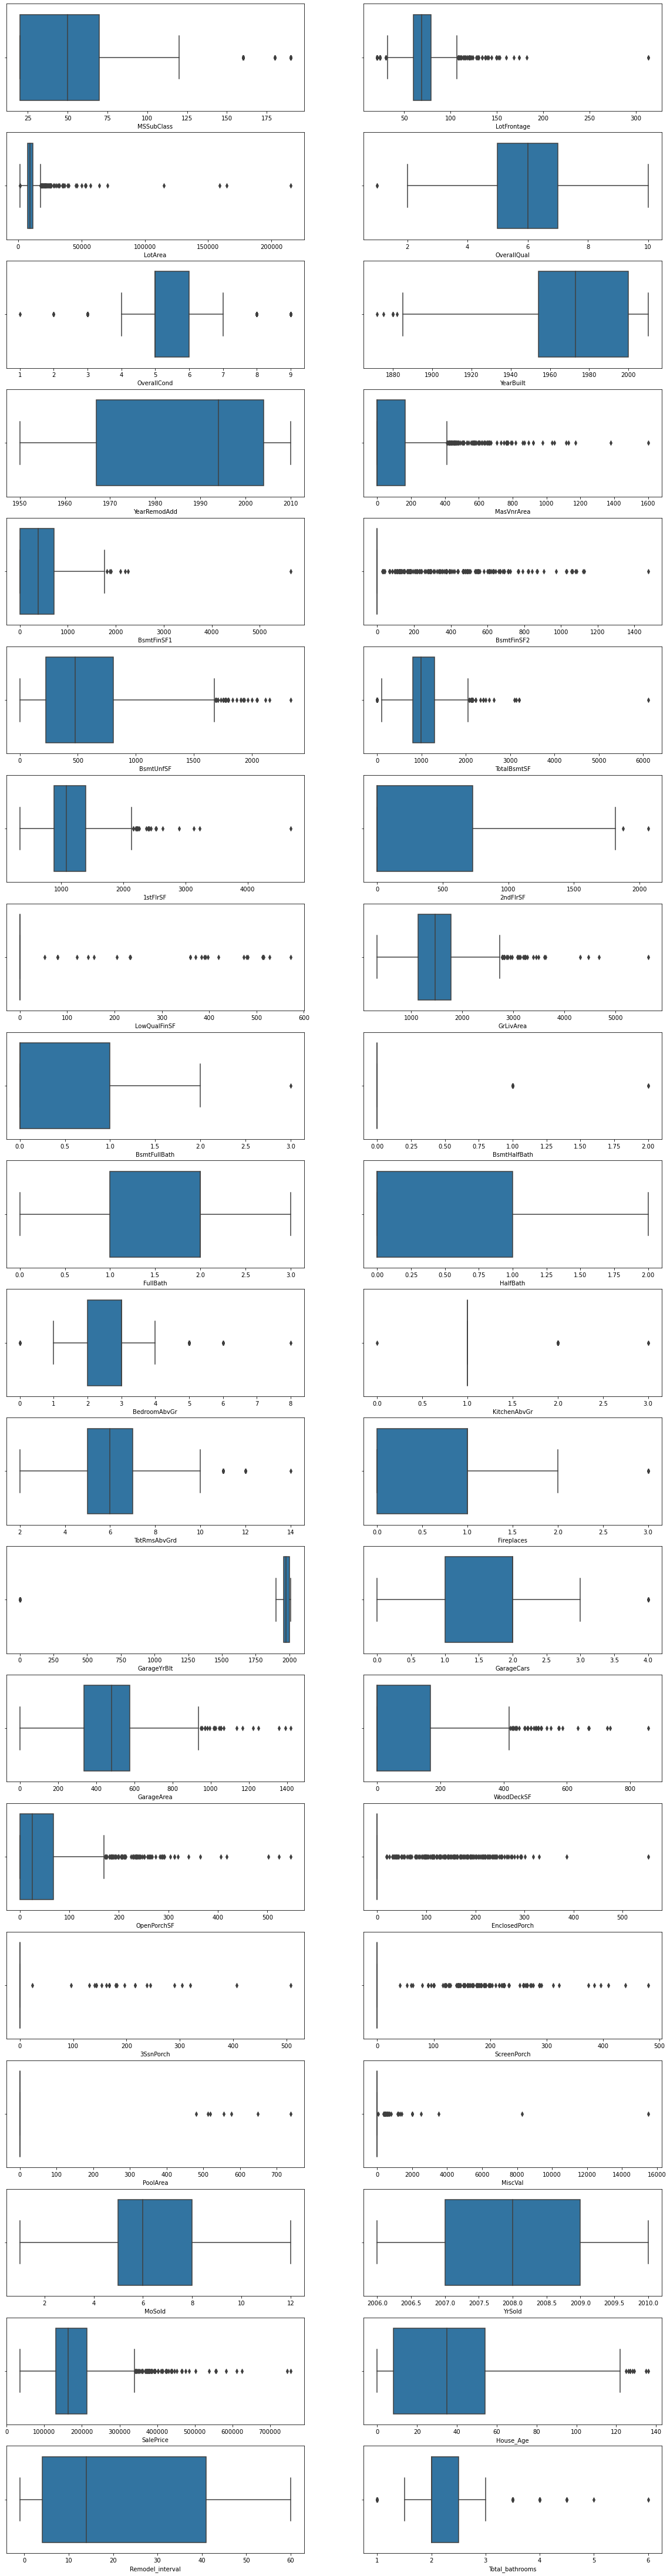

In [1167]:
plt.figure(figsize=(20,100))
index =0 
for i in df[numerical_columns]:
    index=index+1
    plt.subplot(25,2,index)
    sns.boxplot(df[i])
plt.show()

Almost all the numerical features have outliers. Hence we consider only 1 % to 98 %

## 2.7 Columns that needs outlier treatment : 


- 'MSSubClass'
- 'LotFrontage'
- 'LotArea'
- 'OverallQual'
- 'OverallCond'
- 'YearBuilt'
- 'BsmtFinSF1'
- 'BsmtFinSF2'
- 'BsmtUnfSF'
- 'TotalBsmtSF'
- '1stFlrSF'
- '2ndFlrSF'
- 'LowQualFinSF'
- 'GrLivArea'
- 'BsmtFullBath'
- 'BsmtHalfBath'
- 'BedroomAbvGr'
- 'KitchenAbvGr'
- 'TotRmsAbvGrd'
- 'GarageCars'
- 'GarageArea'
- 'WoodDeckSF'
- 'OpenPorchSF'
- 'EnclosedPorch'
- '3SsnPorch'
- 'ScreenPorch'
- 'PoolArea'
- 'MiscVal'
- 'SalePrice'
- 'House_Age'
- 'Total_bathrooms'

In [1168]:
outlier = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice',
       'House_Age', 'Total_bathrooms']

In [1169]:
for i in outlier:
    
    lower = df[i].quantile(0.01)
    upper = df[i].quantile(0.98)
    
    df = df[(lower  <= df[i]) & ( upper >= df[i])]

# 3. EDA Analysis 

## 3.1 Univariate Analysis

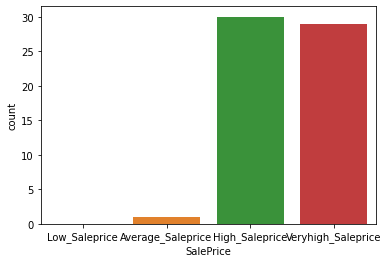

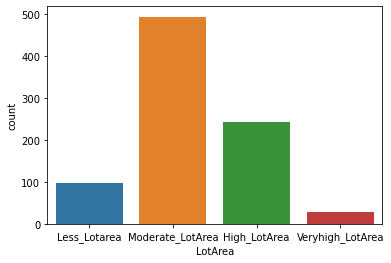

<AxesSubplot:xlabel='YrSold', ylabel='count'>

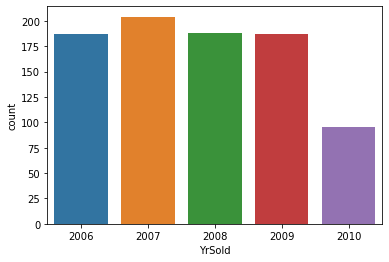

In [1170]:
analysis = pd.DataFrame()

saleprice_bins = [30000 , 50000 , 70000 , 90000 , 100000]
saleprice_labels = ["Low_Saleprice","Average_Saleprice","High_Saleprice","Veryhigh_Saleprice"]

LotArea_bins = [1000 , 5000 , 10000 , 15000 , 25000 ]
LotArea_lables = ["Less_Lotarea","Moderate_LotArea","High_LotArea","Veryhigh_LotArea"]

analysis["SalePrice"] = pd.cut(df["SalePrice"],bins = saleprice_bins,labels = saleprice_labels)
analysis["LotArea"] = pd.cut(df["LotArea"],bins = LotArea_bins,labels = LotArea_lables)


sns.countplot(analysis["SalePrice"])
plt.show()
sns.countplot(analysis["LotArea"])
plt.show()
sns.countplot(df["YrSold"])

## 3.1.1Univariate Inferences

- Majority of our data has very high saleprice. We could observe the average SalePrice is 1,80,000 USD
- Lot Area averages about 10,000 square feet
- Maximum houses were sold between 2006 and 2009

##  3.2 Bivariate Analysis

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

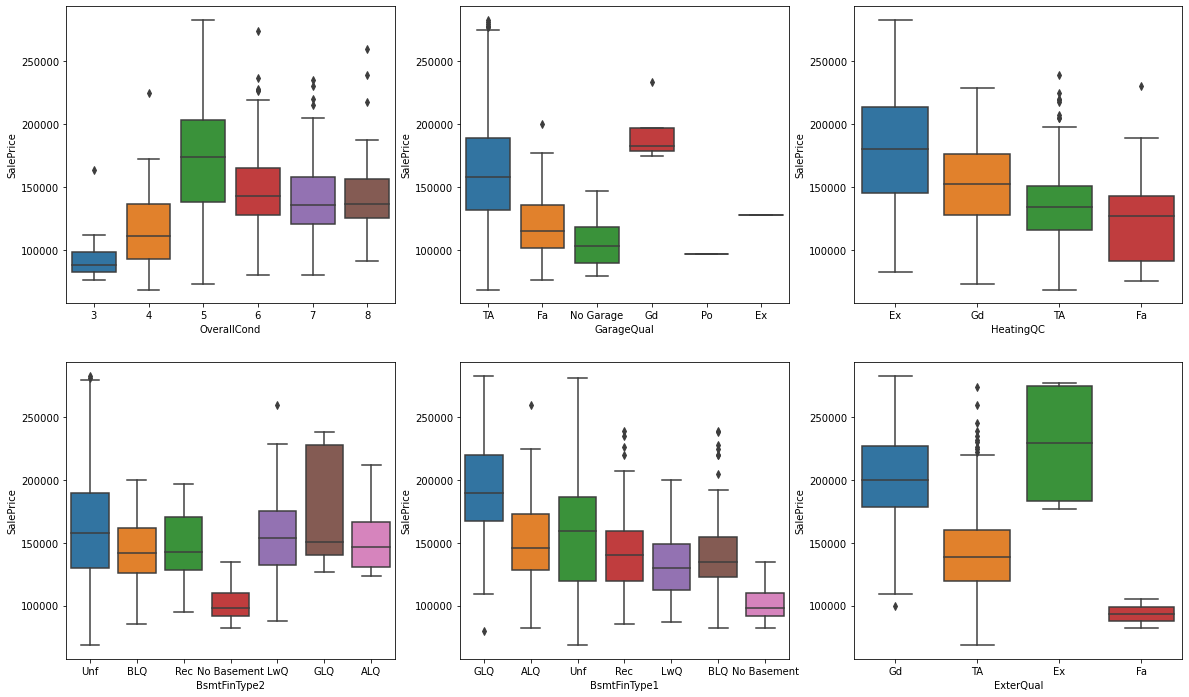

In [1171]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = df)

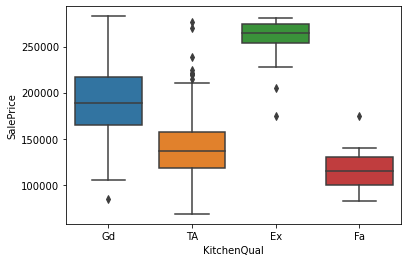

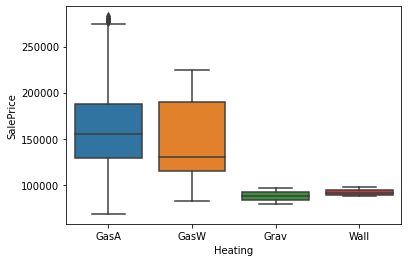

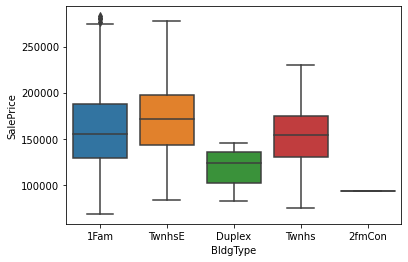

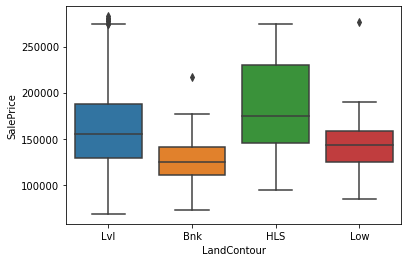

In [1172]:
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = df)
plt.show()
sns.boxplot(x = 'Heating', y = 'SalePrice', data = df)
plt.show()
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = df)
plt.show()
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = df)
plt.show()

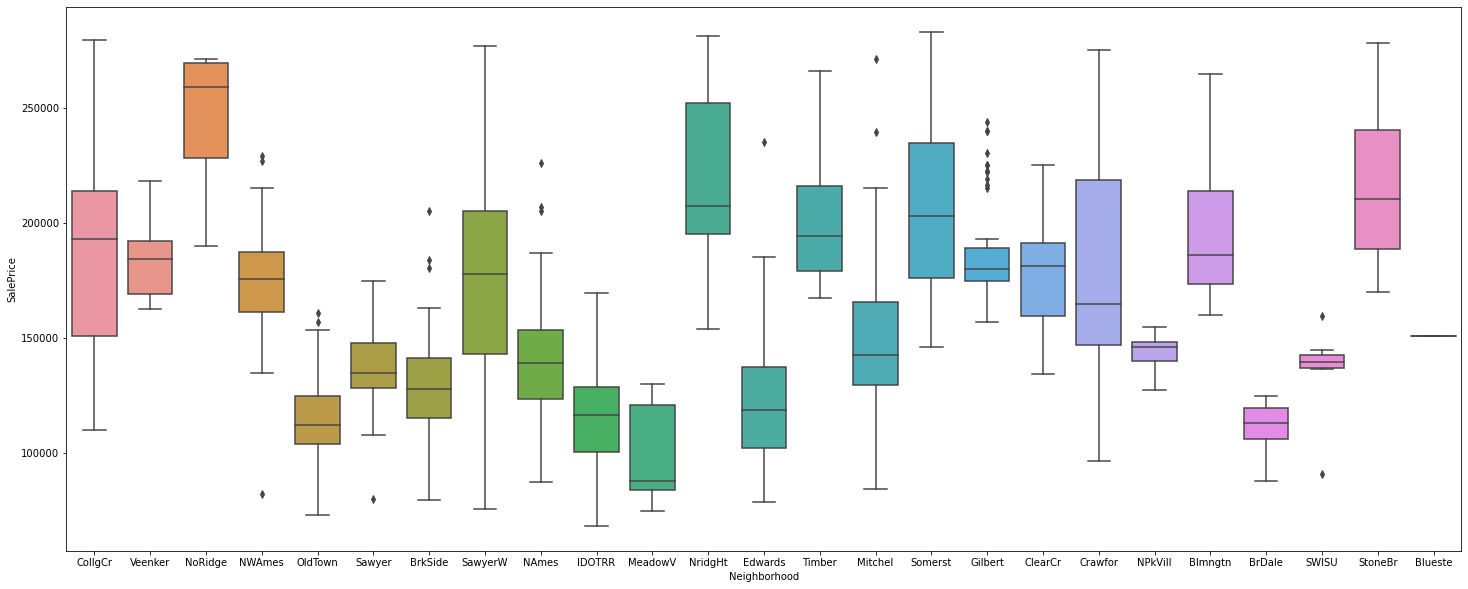

In [1173]:
plt.figure( figsize = (25,10) )
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = df)
plt.show()

### 3.2.1 Bivariate Inferences

1. Houses which has maximum saleprice has "Average" overall condition
2. All high price houses have excellent heating facility . "Gas forced warm air furnace" is the highly preferred heating method
3. Most of high cost houses have "good" external quality
4. Most of high cost houses have "good" kitchen quality
5. "Single-family Detached" is the most preferred building type
6. "Flat" land types are the one's which has high sale price
7. "Northridge" , "Somerset" , are the two places which are highly  preferred as neibouring city for costly houses.

## 3.3  Creating dummy variables

In [1174]:
df.shape

(861, 78)

In [1175]:
object_columns = df.select_dtypes(include=['object']).columns 

In [1176]:
categorical_columns = df[object_columns]

In [1177]:
df[object_columns].nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      15
Exterior1st      13
Condition1        9
SaleType          8
GarageType        7
BsmtFinType2      7
BsmtFinType1      7
HouseStyle        7
SaleCondition     6
GarageCond        6
GarageQual        6
MasVnrType        5
Functional        5
BsmtExposure      5
BsmtQual          5
MSZoning          5
Foundation        5
RoofStyle         5
BldgType          5
LotConfig         5
Electrical        4
LotShape          4
LandContour       4
GarageFinish      4
KitchenQual       4
ExterQual         4
HeatingQC         4
Heating           4
Condition2        4
BsmtCond          4
ExterCond         3
LandSlope         3
RoofMatl          3
PavedDrive        3
Street            2
CentralAir        2
Utilities         1
dtype: int64

In [1178]:
df.drop ( categorical_columns.columns , axis = 1 , inplace = True )

In [1179]:
df.shape

(861, 40)

In [1180]:
categorical_columns = pd.get_dummies(categorical_columns , drop_first = True)

In [1181]:
df = pd.concat([df , categorical_columns],axis=1)

## 3.4 Removing the variables that has the strong correlation with  SalePrice

In [1182]:
correlation = pd.DataFrame(df[numerical_columns].corr()["SalePrice"].sort_values(ascending=False))
correlation

,SalePrice
SalePrice,1.000000
OverallQual,0.763475
GrLivArea,0.692919
Total_bathrooms,0.658570
YearBuilt,0.649337
FullBath,0.621985
GarageCars,0.604052
GarageArea,0.576144
YearRemodAdd,0.561985
TotalBsmtSF,0.492778


In [1183]:
df.drop(['OverallQual','GrLivArea','Total_bathrooms','YearBuilt','FullBath','House_Age'],axis=1,inplace=True)

In [1184]:
numerical_columns = df.select_dtypes(include=["int64","float64"]).columns

# 4. Splitting into train and test

In [1185]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1186]:
df_train.shape

(602, 214)

In [1187]:
df_test.shape

(259, 214)

#  5. Scaling the features

In [1188]:
from sklearn.preprocessing import MinMaxScaler

In [1189]:
scaler = MinMaxScaler()

In [1190]:
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

In [1191]:
df_test[numerical_columns] = scaler.fit_transform(df_test[numerical_columns])

#  6. Classifying the target and predictors

In [1192]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [1193]:
y_test = df_test.pop('SalePrice')
X_test = df_test

#  7. Simple Linear Regression



Constraints:

- P value < 0.5
- VIF < 5

In [1194]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [1195]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     31.94
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          5.13e-170
Time:                        19:50:59   Log-Likelihood:                 951.05
No. Observations:                 602   AIC:                            -1522.
Df Residuals:                     412   BIC:                            -686.1
Df Model:                         189                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.2099      0.404     -2.994      0.003      -2.004      -0.416
MSSubClass                   -0.1408      0.105     -1.336      0.182      -0.348       0.066
LotFrontage                   0.0187      0.027      0.686      0.493      -0.035       0.072
LotArea                       0.0812      0.031      2.601      0.010       0.020       0.143
OverallCond                   0.0862      0.021      4.093      0.000       0.045       0.128
YearRemodAdd                 -0.5517      0.190     -2.907      0.004      -0.925      -0.179
MasVnrArea                    0.0440      0.045      0.988      0.324      -0.044       0.132
BsmtFinSF1                    0.0734      0.020      3.621      0.000       0.034       0.113
BsmtFinSF2                    0.0619      0.036      1.712      0.088      -0.009       0.133
BsmtUnfSF                     0.0053      0.020      0.261      0.794      -0.034       0.045
TotalBsmtSF                   0.0889      0.031      2.869      0.004       0.028       0.150
1stFlrSF                      0.2667      0.038      7.079      0.000       0.193       0.341
2ndFlrSF                      0.3572      0.040      8.943      0.000       0.279       0.436
LowQualFinSF              -3.488e-15   1.06e-15     -3.300      0.001   -5.57e-15   -1.41e-15
BsmtFullBath                 -0.0001      0.009     -0.012      0.991      -0.017       0.017
BsmtHalfBath                 -0.0155      0.014     -1.133      0.258      -0.042       0.011
HalfBath                     -0.0030      0.020     -0.149      0.881      -0.043       0.037
BedroomAbvGr                 -0.0068      0.023     -0.298      0.766      -0.052       0.038
KitchenAbvGr                  0.1030      0.051      2.013      0.045       0.002       0.204
TotRmsAbvGrd                  0.0168      0.025      0.681      0.496      -0.032       0.065
Fireplaces                    0.0578      0.019      3.047      0.002       0.021       0.095
GarageYrBlt                   1.4588      0.613      2.382      0.018       0.255       2.663
GarageCars                    0.0157      0.034      0.461      0.645      -0.051       0.083
GarageArea                    0.0905      0.036      2.499      0.013       0.019       0.162
WoodDeckSF                    0.0118      0.013      0.934      0.351      -0.013       0.036
OpenPorchSF                   0.0385      0.016      2.463      0.014       0.008       0.069
EnclosedPorch                 0.0270      0.017      1.596      0.111      -0.006       0.060
3SsnPorch                 -5.294e-15   1.35e-15     -3.917      0.000   -7.95e-15   -2.64e-15
ScreenPorch                   0.0298      0.016      1.813      0.070      -0.002       0.062
PoolArea                  -2.875e-15   1.07e-15     -2.685      0.008   -4.

In [1196]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


In [1197]:
vif[vif["VIF"]>5]

,Features,VIF
95,RoofStyle_Gable,inf
185,GarageType_No Garage,inf
116,Exterior2nd_CBlock,inf
117,Exterior2nd_CmentBd,inf
105,Exterior1st_CemntBd,inf
...,...,...
74,Condition1_Feedr,5.79
18,TotRmsAbvGrd,5.52
60,Neighborhood_Mitchel,5.51
156,BsmtFinType1_Unf,5.49


We have eliminated only the features that have extreme high p values. Following on , the feature selection will be done in regularization as well 

#  8. regularization

## 8.1 Ridge Regularization

In [1198]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [1199]:
# Considering following alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1200]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
13,2.0,-0.041063,-0.058809,1
12,1.0,-0.038924,-0.059010,2
14,3.0,-0.042602,-0.059034,3
11,0.9,-0.038656,-0.059086,4
10,0.8,-0.038366,-0.059174,5
9,0.7,-0.038055,-0.059285,6
15,4.0,-0.043838,-0.059299,7
8,0.6,-0.037722,-0.059450,8
16,5.0,-0.044877,-0.059567,9
7,0.5,-0.037370,-0.059688,10


In [1201]:
ridge_model_cv.best_params_['alpha']

2.0

In [1202]:
alpha = ridge_model_cv.best_params_['alpha']

In [1203]:
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-4.46936223e-02,  1.13107561e-02,  7.57161568e-02,  6.30511315e-02,
        1.92208402e-02,  3.34618976e-02,  7.47607795e-02,  4.15481666e-02,
        1.43718492e-02,  9.13138076e-02,  1.90407115e-01,  1.98536478e-01,
        0.00000000e+00,  7.12925322e-03, -4.91385141e-03,  2.37964198e-02,
       -4.18691950e-03, -1.31703557e-02,  5.54366577e-02,  7.07555078e-02,
        5.62731844e-03,  3.78674556e-02,  9.03428675e-02,  1.17629909e-02,
        4.05166024e-02,  9.78207062e-03,  0.00000000e+00,  3.01051412e-02,
        0.00000000e+00,  2.37021758e-02,  1.81978936e-02, -4.99083273e-03,
       -1.95535624e-02,  1.51891326e-02,  1.86279973e-02,  4.67383201e-02,
        2.15902598e-03, -3.18781457e-02,  2.28376650e-02,  0.00000000e+00,
        2.82816222e-03,  2.08645275e-02, -2.82382124e-02,  9.70604546e-03,
        2.63045768e-02, -2.94006222e-02,  6.72321194e-04, -1.10354906e-03,
        7.93432310e-04, -9.56813934e-03,  0.00000000e+00,  1.17018416e-03,
        2.88842275e-02,  

In [1204]:
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, ridge.predict(X_test))
print("The mean squared error value is ",mse)

# predicting the R2 value of train data
y_train_pred = ridge.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

y_test_pred = ridge.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The mean squared error value is  0.005796804646779258
The r2 value of train data is  0.9193114349958343
The r2 value of test data is  0.8879238235939002


In [1205]:
#ridge coefficients and Columns

ridge_cols_coeff = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_cols_coeff.reset_index(drop=True, inplace=True)
ridge_cols_coeff.sort_values(by='Coefficient',ascending=False).head(20)

,Features,Coefficient
11,2ndFlrSF,0.1985
10,1stFlrSF,0.1904
9,TotalBsmtSF,0.0913
22,GarageArea,0.0903
55,Neighborhood_Crawfor,0.0773
2,LotArea,0.0757
6,BsmtFinSF1,0.0748
71,Neighborhood_StoneBr,0.0716
19,Fireplaces,0.0708
70,Neighborhood_Somerst,0.0699


In [1206]:
ridge_cols_coeff.shape

(213, 2)

## 8.2 Lasso Regularisation 

In [1207]:
lasso = Lasso()

# Considering following alphas
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1208]:

# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.0003,-0.043369,-0.056329,1
1,0.0002,-0.041444,-0.056401,2
3,0.0004,-0.044873,-0.056466,3
4,0.0005,-0.046105,-0.057036,4
0,0.0001,-0.038663,-0.057498,5
5,0.001,-0.050775,-0.058796,6
6,0.002,-0.057311,-0.062244,7
7,0.003,-0.062780,-0.066681,8
8,0.004,-0.067042,-0.070583,9
9,0.005,-0.071059,-0.074554,10


In [1209]:
lasso_model_cv.best_params_

{'alpha': 0.0003}

In [1210]:
alpha = lasso_model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-3.41205615e-02,  0.00000000e+00,  7.02286880e-02,  6.66207550e-02,
        0.00000000e+00,  0.00000000e+00,  5.99042726e-02,  2.71722703e-02,
       -0.00000000e+00,  9.31528267e-02,  2.67791519e-01,  2.69305725e-01,
        0.00000000e+00,  1.13396368e-02,  0.00000000e+00,  7.92018447e-03,
       -0.00000000e+00, -1.95765534e-02,  1.01385999e-02,  6.07654387e-02,
        0.00000000e+00,  2.83313130e-02,  9.75817588e-02,  8.25396535e-03,
        3.46539960e-02, -0.00000000e+00,  0.00000000e+00,  2.50096133e-02,
        0.00000000e+00,  0.00000000e+00,  9.65942787e-03, -1.63800784e-03,
       -3.20626772e-02,  0.00000000e+00,  0.00000000e+00,  4.26980312e-02,
       -0.00000000e+00, -0.00000000e+00,  7.12099785e-03,  0.00000000e+00,
       -1.28667931e-03,  5.25995693e-03, -5.91676559e-03,  3.24126284e-03,
        2.14562559e-02, -1.66068877e-02, -0.00000000e+00, -4.37709145e-06,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.70625147e-02,  

In [1211]:
# mse
#Lets calculate the mean squared error value
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("The mean squared error value is ",mse)

#predicting the R2 value on train data
y_train_pred = lasso.predict(X_train)
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("The r2 value of train data is ",r2_train)

#predicting the R2 value on test data
y_test_pred = lasso.predict(X_test)
r2_test = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("The r2 value of test data is ",r2_test)

The mean squared error value is  0.00545281155221462
The r2 value of train data is  0.9081187392291501
The r2 value of test data is  0.8945746309089833


In [1212]:
lasso_cols_coeff = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_cols_coeff = lasso_cols_coeff[lasso_cols_coeff['Coefficient'] != 0.00]
lasso_cols_coeff.reset_index(drop=True, inplace=True)
lasso_cols_coeff.sort_values(by="Coefficient",ascending=False).head(20)

,Features,Coefficient
7,2ndFlrSF,0.2693
6,1stFlrSF,0.2678
14,GarageArea,0.0976
5,TotalBsmtSF,0.0932
39,Neighborhood_Somerst,0.0911
30,Neighborhood_Crawfor,0.0837
1,LotArea,0.0702
2,OverallCond,0.0666
40,Neighborhood_StoneBr,0.0629
12,Fireplaces,0.0608


In [1213]:
lasso_cols_coeff.shape

(90, 2)

# 9. Conclusion : 

We have performed both Ridge and Lasso Regularization . These are below metrics obtained from those two : 

For Ridge's Regularization:

- The mean squared error value is  0.00596
- The r2 value of train data is  0.919
- The r2 value of test data is  0.887
- Optimal alpha value : 2.0

For Lasso's Regularization:

- The mean squared error value is  0.00545
- The r2 value of train data is  0.908
- The r2 value of test data is  0.894
- Optimal alpha value : 0.0003
 

By comparing the test score , and mean square error. Lasso is the best performer. Thus the top 20 list of features prioritized by Lasso regularization is. 

- 2ndFlrSF
- 1stFlrSF
- GarageArea
- TotalBsmtSF
- Neighborhood_Somerst
- Neighborhood_Crawfor
- LotArea
- OverallCond
- Neighborhood_StoneBr
- Fireplaces


#  10. Subjective questions : 

###  Q1 : What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [1214]:
alpha_ridge = 2.0*2

alpha = alpha_ridge
ridge = Ridge(alpha=alpha_ridge)
ridge.fit(X_train, y_train)

Ridge(alpha=4.0)

In [1215]:
ridge_new_alpha = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(5)})
ridge_new_alpha.reset_index(drop=True, inplace=True)
ridge_new_alpha.sort_values(by='Coefficient',ascending=False).head(5)

,Features,Coefficient
10,1stFlrSF,0.16112
11,2ndFlrSF,0.15150
9,TotalBsmtSF,0.08686
22,GarageArea,0.08229
55,Neighborhood_Crawfor,0.07463


In [1216]:
alpha_lasso = 0.0003*2

In [1217]:
lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0006)

In [1218]:
lasso_new_alpha = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(5)})
lasso_new_alpha = lasso_new_alpha[lasso_new_alpha['Coefficient'] != 0.00]
lasso_new_alpha.reset_index(drop=True, inplace=True)
lasso_new_alpha.sort_values(by="Coefficient",ascending=False).head(5)

,Features,Coefficient
6,1stFlrSF,0.26764
7,2ndFlrSF,0.26533
5,TotalBsmtSF,0.10187
14,GarageArea,0.09667
31,Neighborhood_Somerst,0.09199


###  Q3 : After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [1219]:
# dropping the top 5 features of lasso.
X_train.drop(columns=["1stFlrSF" , 
"2ndFlrSF" , 
"TotalBsmtSF" , 
"GarageArea" , 
"Neighborhood_Somerst"] , axis=1 , inplace=True)

In [1220]:
lasso = Lasso(alpha=0.0003)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0003)

In [1221]:
lasso_new = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(5)})
lasso_new = lasso_new[lasso_new['Coefficient'] != 0.00]
lasso_new.reset_index(drop=True, inplace=True)
lasso_new.sort_values(by="Coefficient",ascending=False).head(5)

,Features,Coefficient
5,BsmtFinSF1,0.19040
7,BsmtUnfSF,0.16624
11,TotRmsAbvGrd,0.14934
13,GarageCars,0.13462
2,LotArea,0.11556


If we drop the top 5 features and perfrom lasso regularization. Then we get these 5 features as the most important ones.

- TotRmsAbvGrd
- GarageCars
- Fireplaces
- BsmtFinSF1
- Foundation_PConc